<a href="https://colab.research.google.com/github/Milad-Khanchi/ENCS6181/blob/main/ENCS6181.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

Download Dataset:

In [4]:
data = pd.read_excel('https://github.com/Milad-Khanchi/ENCS6181/raw/main/data_akbilgic.xlsx')
data = pd.DataFrame(data)
data

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...,...
531,2011-02-16,0.008599,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
532,2011-02-17,0.009310,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
533,2011-02-18,0.000191,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
534,2011-02-21,-0.013069,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


Get data ready for classification:

In [5]:
data.loc[:,"ISE"][data.loc[:,"ISE"] > 0] = 1
data.loc[:,"ISE"][data.loc[:,"ISE"] < 0] = 0

<ipython-input-5-04ef1f454f64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"ISE"][data.loc[:,"ISE"] > 0] = 1
<ipython-input-5-04ef1f454f64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"ISE"][data.loc[:,"ISE"] < 0] = 0


In [6]:
data = data.drop('ISE.1', axis = 1)

In [7]:
data

,date,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,2009-01-05,1.0,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,2009-01-06,1.0,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,2009-01-07,0.0,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,2009-01-08,0.0,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,2009-01-09,1.0,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...,...
531,2011-02-16,1.0,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
532,2011-02-17,1.0,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
533,2011-02-18,1.0,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
534,2011-02-21,0.0,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


Find Missing values:

In [8]:
data.isnull().sum()

date       0
ISE        0
SP         0
DAX        0
FTSE       0
NIKKEI     0
BOVESPA    0
EU         0
EM         0
dtype: int64

In [9]:
missing = []

for item in data.columns:
   missing.append([data[item].eq('?').sum(), item])

missing

[[0, 'date'],
 [0, 'ISE'],
 [0, 'SP'],
 [0, 'DAX'],
 [0, 'FTSE'],
 [0, 'NIKKEI'],
 [0, 'BOVESPA'],
 [0, 'EU'],
 [0, 'EM']]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

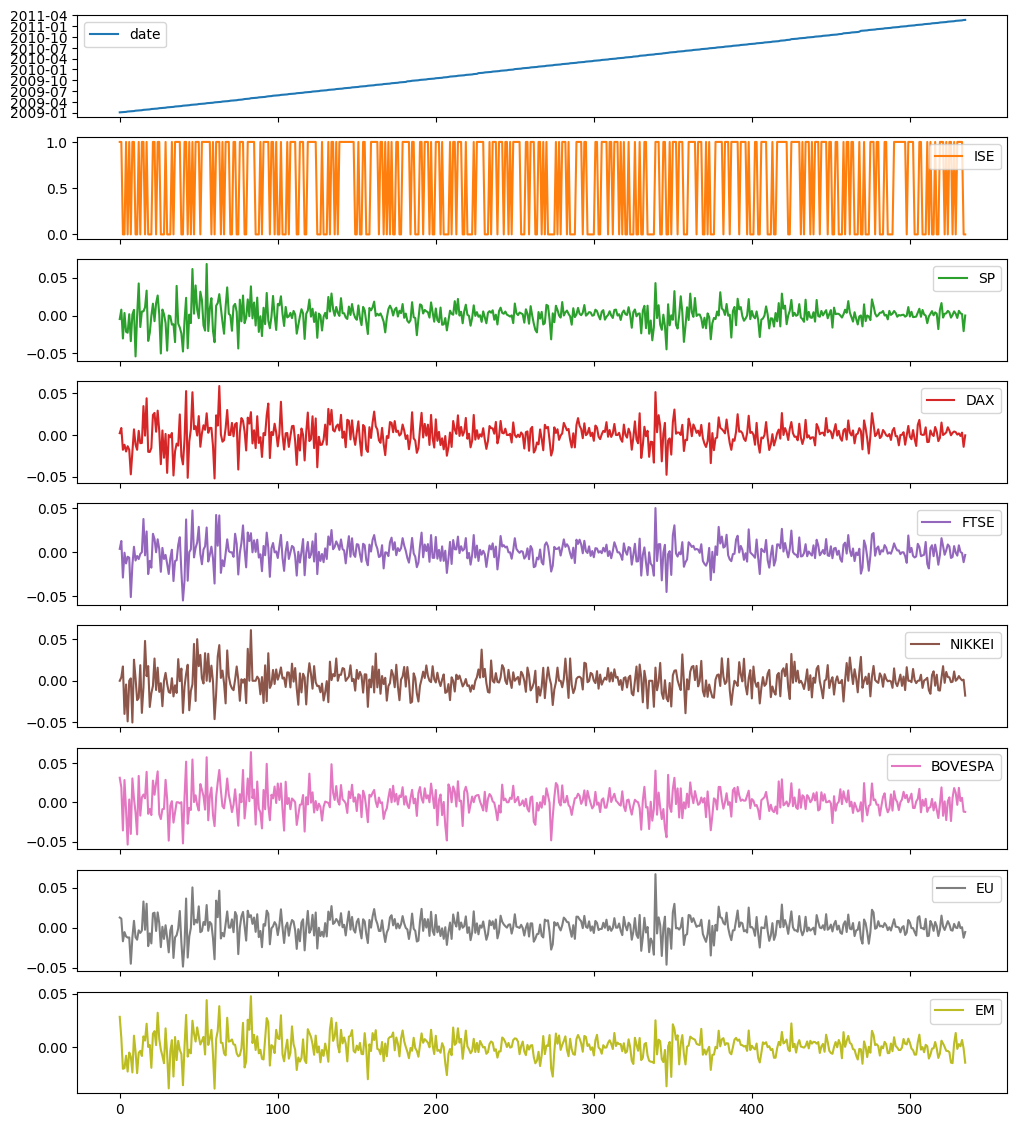

In [10]:
data.plot(figsize = (12,14), subplots = True)

#Split the dataset into trainset and testset:
(Using Jan 2009 to Oct 2010 for trainset and Nov 2010 to Feb 2011 for testset)

(458 instances for trainset and 78 instances for testset)

In [11]:
trainset = data.drop(data.index[458:])
trainset = trainset.drop('date', axis = 1)
trainset

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,1.0,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,1.0,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,0.0,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,0.0,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,1.0,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...
453,1.0,0.001772,0.013164,0.005049,-0.000546,-0.010753,0.008505,0.004985
454,1.0,0.002386,-0.000782,-0.002870,0.005343,-0.001753,-0.002511,0.000089
455,0.0,0.002145,0.005039,0.001845,-0.002714,0.000719,0.002497,0.006881
456,0.0,0.000017,-0.003835,-0.007802,-0.002533,0.016534,-0.006240,0.002830


In [12]:
testset = data.drop(data.index[0:458])
testset = testset.reset_index(drop=True)
testset = testset.drop('date', axis = 1)
testset

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,1.0,0.001631,0.005596,0.008571,-0.025059,0.013959,0.004240,0.014254
1,0.0,0.007729,0.007459,0.010968,0.000574,0.004796,0.007955,0.000466
2,1.0,0.003671,-0.005502,-0.001460,0.021471,0.000000,-0.005426,0.005992
3,1.0,0.019099,0.017509,0.019601,0.000000,0.015059,0.016419,0.010737
4,0.0,0.003915,0.002893,0.002147,0.028152,-0.005343,-0.001128,0.004166
...,...,...,...,...,...,...,...,...
73,1.0,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
74,1.0,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
75,1.0,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
76,0.0,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


Unnormalized (row) data:

In [13]:
x_train = trainset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']]
x_train = x_train.to_numpy()

x_test = testset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']]
x_test = x_test.to_numpy()

y_train = trainset.loc[:, ['ISE']]
y_train = y_train.to_numpy()

y_test = testset.loc[:, ['ISE']]
y_test = y_test.to_numpy()

In [14]:
pd.DataFrame(y_train)

,0
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
453,1.0
454,1.0
455,0.0
456,0.0


#Define Cross Entropy error:

In [15]:
def CE(y,yh):
    m = np.mean(y*np.log1p(1/yh-1)+(1-y)*np.log1p(1/(1-yh)-1))
    return m

#First Method: "Least-squares"

In [16]:
# Import packages.
import cvxpy as cp
import numpy as np

In [17]:
A = x_train
print(A.shape)

#add bias
N = A.shape[0]
A = np.column_stack([A,np.ones(N)])

print(A.shape)

b = y_train
print(b.shape)

(458, 7)
(458, 8)
(458, 1)


In [18]:
# Define and solve the CVXPY problem.
x = cp.Variable([A.shape[1],b.shape[1]])
#A is features and b is output
cost = cp.sum_squares(A @ x - b)
#x is weights
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", (cp.pnorm(A @ x - b, p=2).value)**2)


The optimal value is 80.2218754286224
The optimal x is
[[ 2.43508611]
 [-1.662474  ]
 [ 4.66656432]
 [-0.72822111]
 [-3.68057749]
 [10.90607462]
 [10.76233048]
 [ 0.56183354]]
The norm of the residual is  80.22187542862241


Predict class of trainset to calculate the mean of the outputs:

In [19]:
yh = np.dot(A,x.value)
print(np.mean(yh))
mean = np.mean(yh)

0.5764192139737991


Use weights for predicting testset:

In [20]:
#Add bias to testset
A1 = x_test
N = A1.shape[0]
A1 = np.column_stack([A1,np.ones(N)])

In [21]:
yh = np.dot(A1,x.value)

yh = yh.reshape(-1)
y = y_test.reshape(-1)

print("Cross Entropy error is:" ,CE(y,yh))

Cross Entropy error is: 0.5891622508509462


Calculate the accuracy:

In [22]:
def accuracy(yh, y):
  T = 0
  F = 0
  Total = yh.shape[0]

  for i in range(yh.shape[0]):
    if yh[i] == y[i]:
      T += 1
    else:
      F += 1
  return T/Total*100

In [23]:
yh[yh > mean] = 1
yh[yh < mean] = 0

print(accuracy(yh, y_test))
print("The norm of the residual is ", (cp.pnorm(A1 @ x - y_test, p=2).value)**2)

66.66666666666666
The norm of the residual is  15.853737623833178


Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

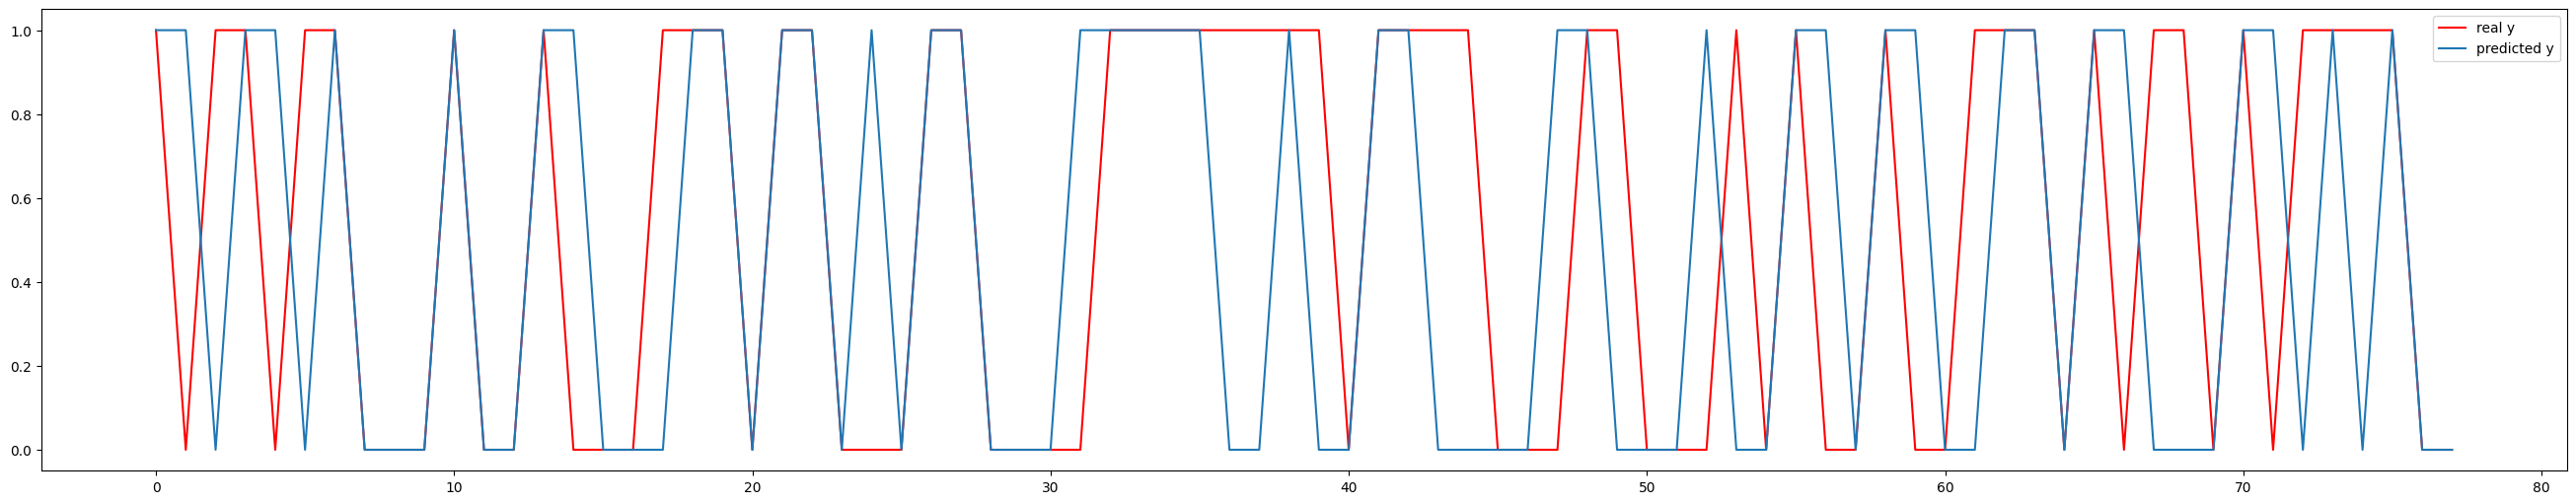

In [24]:
figure, axes = plt.subplots(ncols = 1, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes.plot(y_test, label = 'real y', color = 'r')
axes.plot(yh, label = 'predicted y')
plt.legend()
plt.show()

#Second Method: "SVM"

In [25]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [26]:
y = y_train

y[y <= 0] = -1
y[y > 0] = 1

In [27]:
#Initializing values and computing H. Note the 1. to force to float type
C = 100
m,n = A.shape
X = A
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
#print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

     pcost       dcost       gap    pres   dres
 0:  2.0856e+04 -1.0527e+06  1e+06  7e-15  5e-13
 1: -3.2234e+03 -1.3539e+05  1e+05  8e-14  3e-13
 2: -1.7682e+04 -4.2999e+04  3e+04  2e-13  5e-13
 3: -2.4043e+04 -3.4365e+04  1e+04  6e-13  6e-13
 4: -2.6172e+04 -3.1662e+04  5e+03  4e-13  6e-13
 5: -2.7207e+04 -3.0421e+04  3e+03  4e-13  5e-13
 6: -2.7953e+04 -2.9511e+04  2e+03  2e-13  6e-13
 7: -2.8373e+04 -2.9003e+04  6e+02  6e-13  7e-13
 8: -2.8550e+04 -2.8800e+04  3e+02  1e-13  6e-13
 9: -2.8648e+04 -2.8688e+04  4e+01  4e-13  7e-13
10: -2.8663e+04 -2.8671e+04  8e+00  2e-13  7e-13
11: -2.8667e+04 -2.8667e+04  4e-01  2e-13  7e-13
12: -2.8667e+04 -2.8667e+04  4e-03  2e-13  7e-13
Optimal solution found.
w =  [ 8.06206630e+00  1.67897069e+01  2.44816067e+01  1.17673877e+01
  8.33277076e-01  2.30189992e+01  2.64700534e+01 -5.68434189e-14]
b =  [0.27095316]


Predict the testset:

In [28]:
y = y_test

y[y <= 0] = -1
y[y > 0] = 1

In [29]:
yh = np.sign(np.dot(A1,w.flatten().reshape(((A1.shape[1],y_test.shape[1]))) + b[0]))
print("The norm of the residual is ", (cp.pnorm(yh - y, p=2).value)**2)

The norm of the residual is  103.99999999999999


Calculate Accuracy:

In [30]:
def accuracy(yh, y):
  T = 0
  F = 0
  Total = yh.shape[0]

  for i in range(yh.shape[0]):
    if yh[i] == y[i]:
      T += 1
    else:
      F += 1
  return T/Total*100

In [31]:
accuracy(yh, y)

66.66666666666666

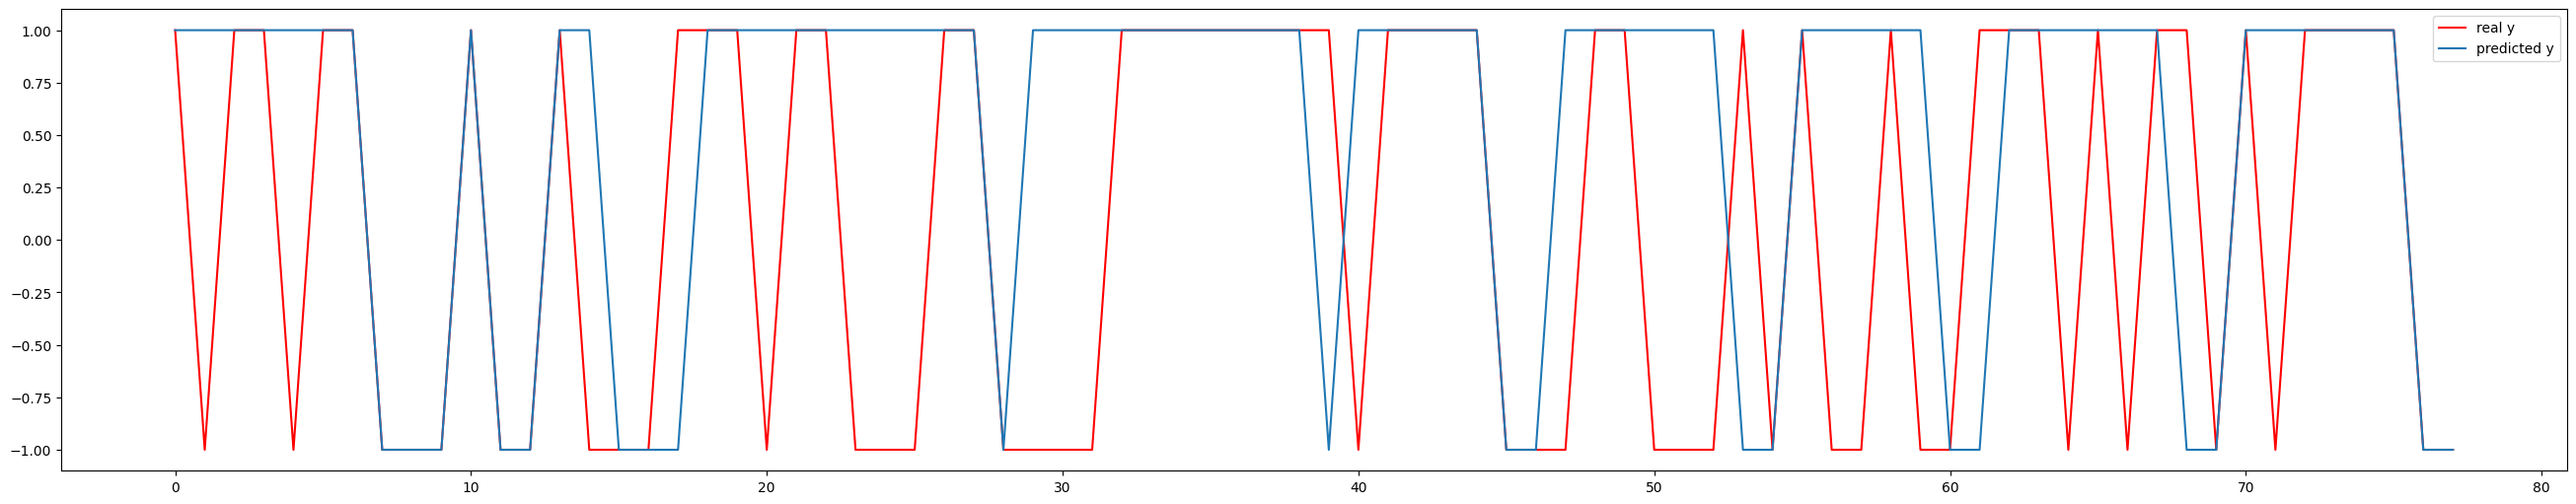

In [32]:
figure, axes = plt.subplots(ncols = 1, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes.plot(y, label = 'real y', color = 'r')
axes.plot(yh, label = 'predicted y')
plt.legend()
plt.show()

##Normalized Data:

In [33]:
from sklearn import preprocessing

Two ways of normalization:

In [34]:
scaler = preprocessing.StandardScaler().fit(trainset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']].to_numpy())

In [35]:
# scaler = preprocessing.Normalizer().fit(trainset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']].to_numpy())

Use method:

In [36]:
normalized_trainset = scaler.transform(trainset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']].to_numpy())
normalized_trainset = pd.DataFrame(normalized_trainset, columns = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'])


In [37]:
normalized_testset = scaler.transform(testset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']].to_numpy())
normalized_testset = pd.DataFrame(normalized_testset, columns = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'])


In [38]:
x_train1 = normalized_trainset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']]
x_train1 = x_train1.to_numpy()

x_test1 = normalized_testset.loc[:, ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']]
x_test1 = x_test1.to_numpy()

y_train1 = trainset.loc[:, ['ISE']]
y_train1 = y_train1.to_numpy()

y_test1 = testset.loc[:, ['ISE']]
y_test1 = y_test1.to_numpy()


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

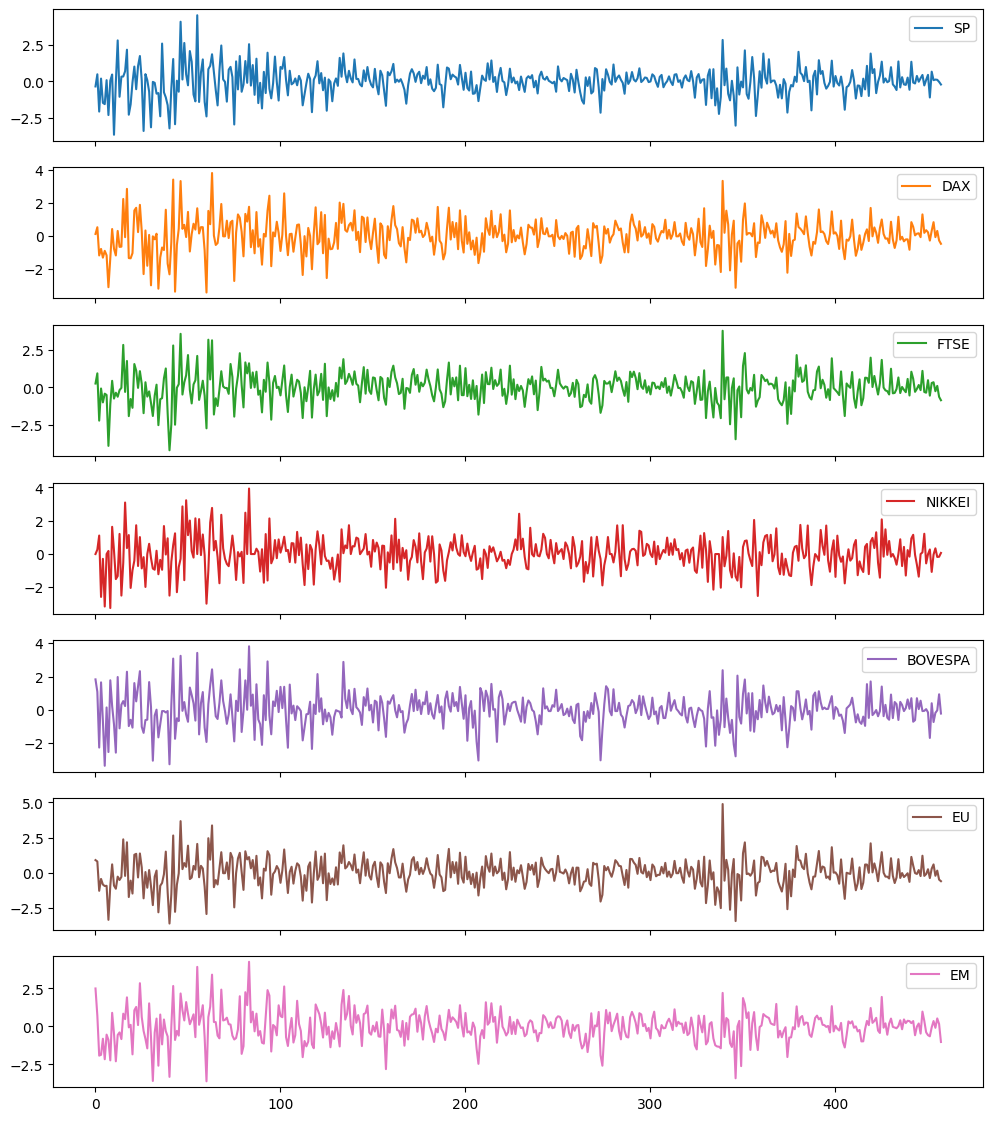

In [39]:
normalized_trainset.plot(figsize = (12,14), subplots = True)

#First Method: "Least-squares"

In [40]:
# Import packages.
import cvxpy as cp
import numpy as np

In [41]:
A = x_train1

#add bias
N = A.shape[0]
A = np.column_stack([A,np.ones(N)])

print(A.shape)

b = y_train1
print(b.shape)

(458, 8)
(458, 1)


In [42]:
#calculate running time:
from timeit import default_timer as timer
start = timer()

# Define and solve the CVXPY problem.
x = cp.Variable([A.shape[1],b.shape[1]])
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", (cp.pnorm(A @ x - b, p=2).value)**2)

end = timer()
print(end - start)


The optimal value is 80.2218754286224
The optimal x is
[[ 0.03643817]
 [-0.02556585]
 [ 0.06148073]
 [-0.01130772]
 [-0.06038136]
 [ 0.14889103]
 [ 0.11849164]
 [ 0.57641921]]
The norm of the residual is  80.22187542862241
0.07971887200000083


Predict trainset to calculate mean of predicted values:

In [43]:
yh = np.dot(A,x.value)
mean = np.mean(yh)
print(mean)

0.5764192139737991


Use weights for predicting testset:

In [44]:
#Add bias to testset
A1 = x_test1
N = A1.shape[0]
A1 = np.column_stack([A1,np.ones(N)])

In [45]:
yh = np.dot(A1,x.value)

yh = yh.reshape(-1,1)
y = y_test1.reshape(-1,1)
print("Cross Entropy error is:", CE(y,yh))
yh[yh > mean] = 1
yh[yh < mean] = 0

Cross Entropy error is: 0.5891622508509462


Calculate the accuracy:

In [46]:
def accuracy(yh, y):
  T = 0
  F = 0
  Total = yh.shape[0]

  for i in range(yh.shape[0]):
    if yh[i] == y[i]:
      T += 1
    else:
      F += 1
  return T/Total*100

In [47]:
print(accuracy(yh, y))
print("The norm of the residual is ", (cp.pnorm(A1 @ x - y_test1, p=2).value)**2)

66.66666666666666
The norm of the residual is  15.853737623833178


Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

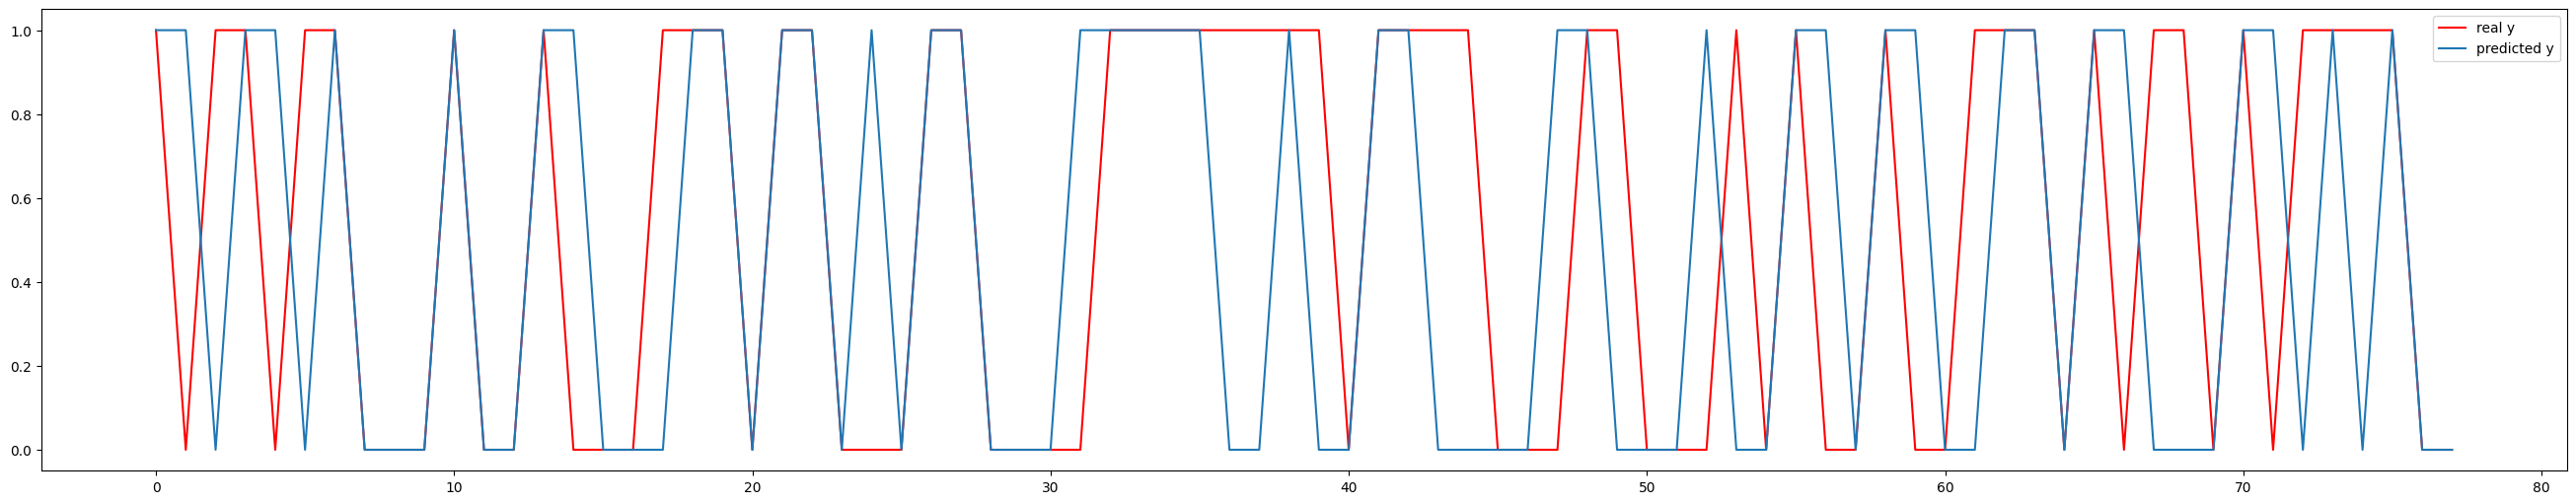

In [48]:
figure, axes = plt.subplots(ncols = 1, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes.plot(y_test1, label = 'real y', color = 'r')
axes.plot(yh, label = 'predicted y')
plt.legend()
plt.show()

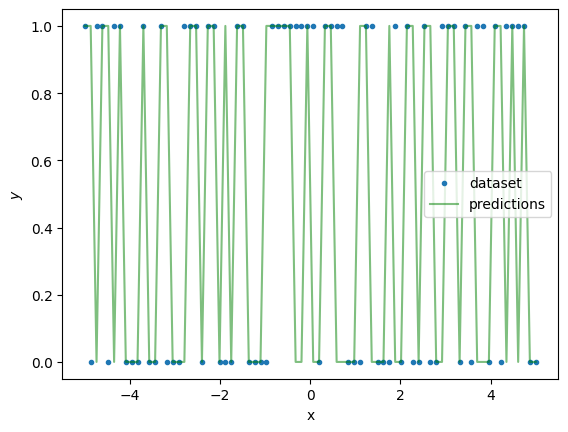

In [49]:
N = len(yh.reshape(-1))
x = np.linspace(-5,5, N)
plt.plot(x, y.reshape(-1), '.', label='dataset')
plt.plot(x, yh.reshape(-1), 'g', alpha=.5, label='predictions')
plt.xlabel('x')
plt.ylabel(r'$y$')
plt.legend()
plt.savefig('TRI', format='pdf', bbox_inches='tight')
plt.show()

#Second Method: "SVM"

In [50]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [51]:
y = y_train1

y[y <= 0] = -1
y[y > 0] = 1

In [52]:
#calculate running time:
from timeit import default_timer as timer

start = timer()

#Initializing values and computing H. Note the 1. to force to float type
C = 100
m,n = A.shape
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
#print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

end = timer()
print(end - start)

     pcost       dcost       gap    pres   dres
 0:  2.0856e+04 -1.0527e+06  1e+06  7e-15  5e-13
 1: -3.2234e+03 -1.3539e+05  1e+05  8e-14  3e-13
 2: -1.7682e+04 -4.2999e+04  3e+04  2e-13  5e-13
 3: -2.4043e+04 -3.4365e+04  1e+04  6e-13  6e-13
 4: -2.6172e+04 -3.1662e+04  5e+03  4e-13  6e-13
 5: -2.7207e+04 -3.0421e+04  3e+03  4e-13  5e-13
 6: -2.7953e+04 -2.9511e+04  2e+03  2e-13  6e-13
 7: -2.8373e+04 -2.9003e+04  6e+02  6e-13  7e-13
 8: -2.8550e+04 -2.8800e+04  3e+02  1e-13  6e-13
 9: -2.8648e+04 -2.8688e+04  4e+01  4e-13  7e-13
10: -2.8663e+04 -2.8671e+04  8e+00  2e-13  7e-13
11: -2.8667e+04 -2.8667e+04  4e-01  2e-13  7e-13
12: -2.8667e+04 -2.8667e+04  4e-03  2e-13  7e-13
Optimal solution found.
w =  [ 8.06206630e+00  1.67897069e+01  2.44816067e+01  1.17673877e+01
  8.33277076e-01  2.30189992e+01  2.64700534e+01 -5.68434189e-14]
b =  [0.27095316]
0.7321927029999813


Predict the trainset:

In [53]:
A = X
yh = np.sign(np.dot(A,w.flatten().reshape((A.shape[1],y_train.shape[1]))) + b[0])
accuracy(yh, y)

74.89082969432314

Predict the testset:

In [54]:
y = y_test1

y[y <= 0] = -1
y[y > 0] = 1

In [55]:
yh = np.sign(np.dot(A1,w.flatten().reshape((A1.shape[1],y.shape[1]))) + b[0])

print(yh.shape)
print(y.shape)

(78, 1)
(78, 1)


Calculate Accuracy:

In [56]:
def accuracy(yh, y):
  T = 0
  F = 0
  Total = yh.shape[0]

  for i in range(yh.shape[0]):
    if yh[i] == y[i]:
      T += 1
    else:
      F += 1
  return T/Total*100

In [57]:
print(accuracy(yh, y))
print("The norm of the residual is ", (cp.pnorm(yh - y, p=2).value)**2)

65.38461538461539
The norm of the residual is  108.0


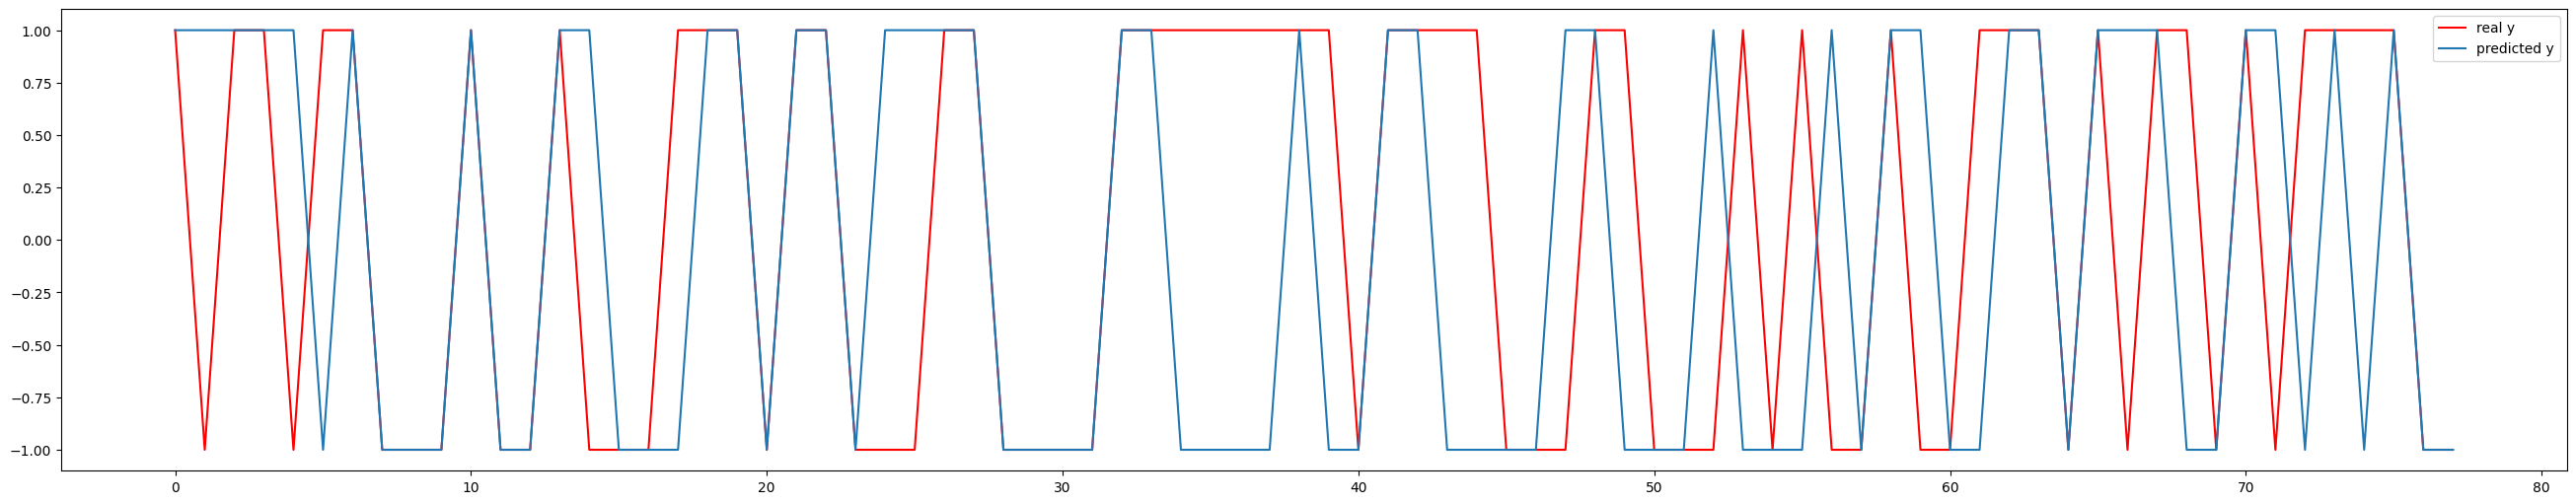

In [58]:
figure, axes = plt.subplots(ncols = 1, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes.plot(y, label = 'real y', color = 'r')
axes.plot(yh, label = 'predicted y')
plt.legend()
plt.show()

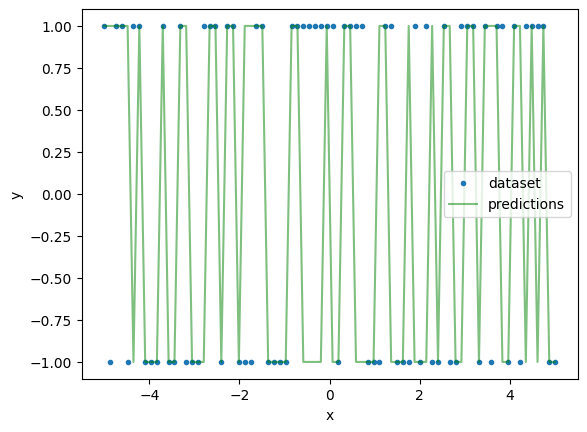

In [59]:
N = len(yh.reshape(-1))
x = np.linspace(-5,5, N)
plt.plot(x, y.reshape(-1), '.', label='dataset')
plt.plot(x, yh.reshape(-1), 'g', alpha=.5, label='predictions')
plt.xlabel('x')
plt.ylabel(r'y')
plt.legend()
plt.savefig('TRIss', format='pdf', bbox_inches='tight')
plt.show()

##Use previous data to predict todays Total return index:

(only data of yesterday)

The LS method:

In [60]:
A = x_train1
A = np.delete(A,-1,0)
m,n = A.shape
A = np.append(np.zeros([1,n]), A, axis = 0)
A = np.concatenate((x_train1, A), axis = 1)

#add bias
N = A.shape[0]
A = np.column_stack([A,np.ones(N)])

print(A.shape)

b = y_train1
print(b.shape)

(458, 15)
(458, 1)


In [61]:
# Define and solve the CVXPY problem.
x = cp.Variable([A.shape[1],b.shape[1]])
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", (cp.pnorm(A @ x - b, p=2).value)**2)


The optimal value is 313.089948652712
The optimal x is
[[ 0.11109053]
 [-0.05838727]
 [ 0.08771959]
 [-0.00442458]
 [-0.08829408]
 [ 0.29005487]
 [ 0.2008391 ]
 [ 0.04249884]
 [-0.14601573]
 [-0.19459798]
 [ 0.02737582]
 [ 0.14525163]
 [ 0.21119686]
 [-0.07457911]
 [ 0.15316142]]
The norm of the residual is  313.0899486527121


Predict trainset to calculate mean of predicted values:

In [62]:
yh = np.dot(A,x.value)
mean = np.mean(yh)
print(mean)

0.15283842794759825


Use weights for predicting testset:

In [63]:
A1 = x_test1
A1 = np.delete(A1,0,0)
m,n = A1.shape
A1 = np.append(np.zeros([1,n]), A1, axis = 0)
A1 = np.concatenate((x_test1, A1), axis = 1)

#Add bias to testset
N = A1.shape[0]
A1 = np.column_stack([A1,np.ones(N)])

In [64]:
y = y_test1
y[y <= 0] = 0
y[y >  0] = 1

In [65]:
yh = np.dot(A1,x.value)

yh = yh.reshape(-1)
y  = y.reshape(-1)

print("Cross Entropy error is", CE(y,yh))

yh[yh > mean] = 1
yh[yh < mean] = 0

Cross Entropy error is nan


<ipython-input-15-5ce4873608af>:2: RuntimeWarning: invalid value encountered in log1p
  m = np.mean(y*np.log1p(1/yh-1)+(1-y)*np.log1p(1/(1-yh)-1))


Calculate the accuracy:

In [66]:
def accuracy(yh, y):
  T = 0
  F = 0
  Total = yh.shape[0]

  for i in range(yh.shape[0]):
    if yh[i] == y[i]:
      T += 1
    else:
      F += 1
  return T/Total*100

In [67]:
print(accuracy(yh, y))
print("The norm of the residual is ", (cp.pnorm(yh - y, p=2).value)**2)

64.1025641025641
The norm of the residual is  28.000000000000004


Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

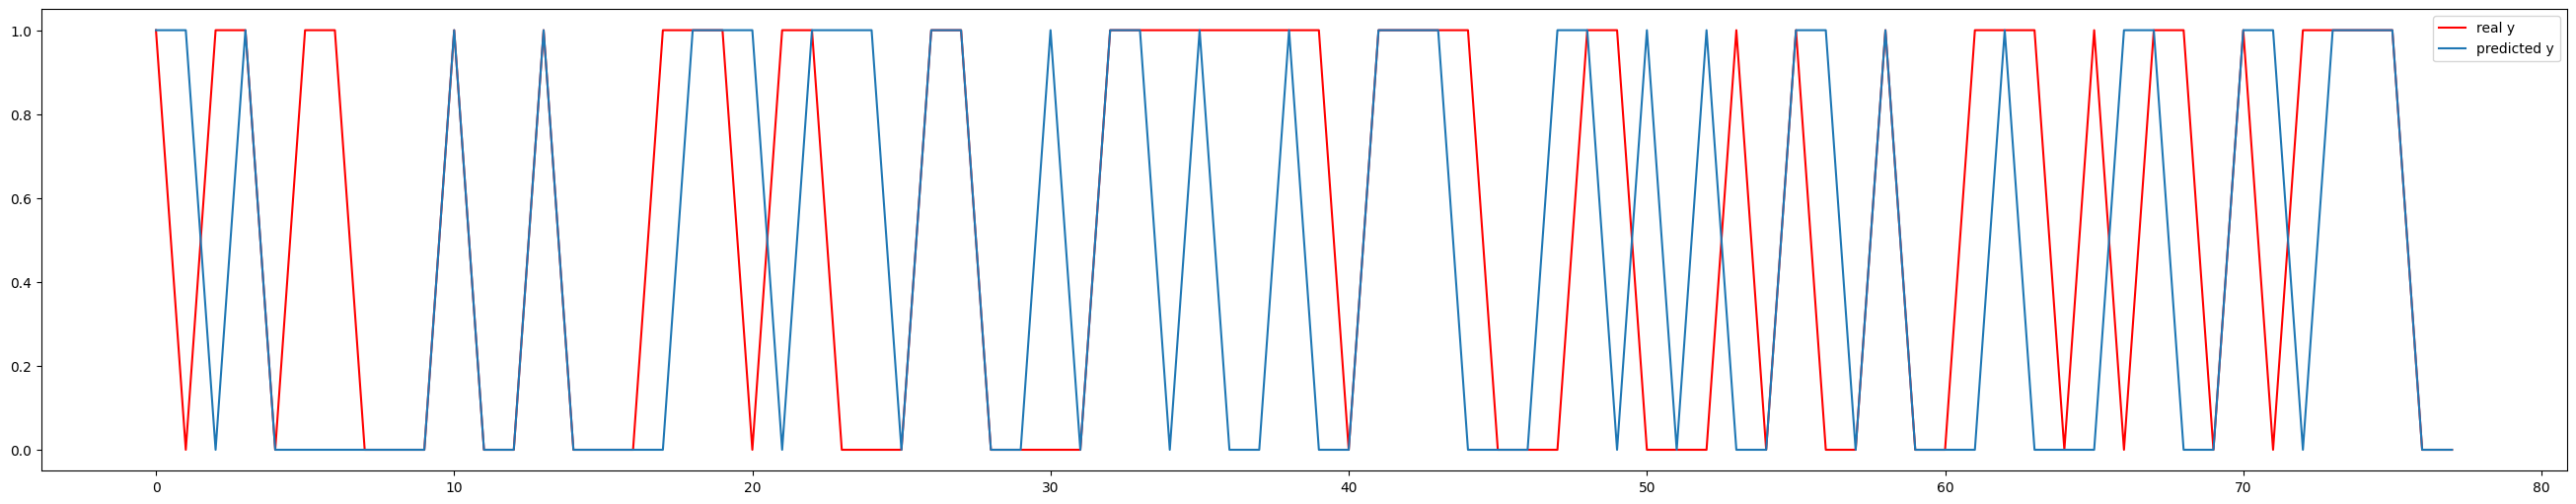

In [68]:
figure, axes = plt.subplots(ncols = 1, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes.plot(y_test1, label = 'real y', color = 'r')
axes.plot(yh, label = 'predicted y')
plt.legend()
plt.show()

The SVM method:

In [69]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [70]:
y = y_train1

y[y <= 0] = -1
y[y > 0] = 1

In [71]:
#Initializing values and computing H. Note the 1. to force to float type
C = 100
m,n = A.shape
X = A
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
#print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

     pcost       dcost       gap    pres   dres
 0: -1.4582e+04 -4.7163e+06  1e+07  1e+00  4e-12
 1: -1.2320e+04 -1.9929e+06  2e+06  7e-02  4e-12
 2: -1.4875e+04 -1.4516e+05  1e+05  3e-03  4e-12
 3: -1.7203e+04 -3.8768e+04  2e+04  4e-04  5e-12
 4: -2.0901e+04 -3.4464e+04  1e+04  2e-04  5e-12
 5: -2.3349e+04 -2.9752e+04  6e+03  9e-05  5e-12
 6: -2.4128e+04 -2.8623e+04  4e+03  6e-05  5e-12
 7: -2.4985e+04 -2.7306e+04  2e+03  2e-05  5e-12
 8: -2.5362e+04 -2.6720e+04  1e+03  1e-05  5e-12
 9: -2.5564e+04 -2.6412e+04  8e+02  6e-06  5e-12
10: -2.5756e+04 -2.6130e+04  4e+02  2e-06  6e-12
11: -2.5855e+04 -2.5997e+04  1e+02  4e-07  7e-12
12: -2.5902e+04 -2.5941e+04  4e+01  1e-07  5e-12
13: -2.5918e+04 -2.5921e+04  3e+00  3e-09  6e-12
14: -2.5920e+04 -2.5920e+04  4e-02  4e-11  6e-12
15: -2.5920e+04 -2.5920e+04  4e-04  5e-13  7e-12
Optimal solution found.
w =  [ 2.28879410e-01 -9.22721418e-02  5.02191754e-01  3.48257098e-02
 -1.76325967e-01  6.22962794e-01  5.75774456e-01 -2.08808447e-02
 -4.99662

Predict the trainset to calculate the mean of the output:

In [72]:
A = X
yh = np.sign(np.dot(A,w.flatten().reshape((A.shape[1],y_train.shape[1]))) + b[0])
accuracy(yh, y)

73.58078602620087

Predict the testset:

In [73]:
y = y_test1

y[y <= 0] = -1
y[y > 0] = 1

In [74]:
yh = np.sign(np.dot(A1,w.flatten().reshape(((A1.shape[1],y_test.shape[1]))) + b[0]))

yh = yh.reshape(-1)
y = y.reshape(-1)

print(yh.shape)
print(y.shape)

(78,)
(78,)


Calculate Accuracy:

In [75]:
def accuracy(yh, y):
  T = 0
  F = 0
  Total = yh.shape[0]

  for i in range(yh.shape[0]):
    if yh[i] == y[i]:
      T += 1
    else:
      F += 1
  return T/Total*100

In [76]:
print(accuracy(yh, y))
print("The norm of the residual is ", (cp.pnorm(yh - y, p=2).value)**2)

65.38461538461539
The norm of the residual is  108.0


##Use previous data to predict todays Total return index:

(only data of two days before)

The LS model:

In [77]:
A = x_train1
A = np.delete(A,-1,0)
B = np.delete(A,-1,0)

m,n = A.shape
A = np.append(np.zeros([1,n]), A, axis = 0)

m,n = B.shape
B = np.append(np.zeros([1,n]), B, axis = 0)
B = np.append(np.zeros([1,n]), B, axis = 0)

A = np.concatenate((x_train1, A, B), axis = 1)

#add bias
N = A.shape[0]
A = np.column_stack([A,np.ones(N)])

print(A.shape)

b = y_train1
b[b <= 0] = 0
b[b >  0] = 1
print(b.shape)

(458, 22)
(458, 1)


In [78]:
# Define and solve the CVXPY problem.
x = cp.Variable([A.shape[1],b.shape[1]])
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", (cp.pnorm(A @ x - b, p=2).value)**2)


The optimal value is 77.01572234581974
The optimal x is
[[ 0.06836054]
 [-0.02891869]
 [ 0.04196491]
 [ 0.00353374]
 [-0.04786758]
 [ 0.13486956]
 [ 0.10653708]
 [ 0.03686742]
 [-0.07889822]
 [-0.12049619]
 [ 0.04132184]
 [ 0.07387772]
 [ 0.10661577]
 [-0.04035526]
 [ 0.01308918]
 [-0.03430538]
 [-0.0460912 ]
 [ 0.00508638]
 [ 0.02807662]
 [ 0.00129884]
 [-0.0067622 ]
 [ 0.57688423]]
The norm of the residual is  77.01572234581973


Use weights for predicting trainset:

In [79]:
A = x_train1
A = np.delete(A,-1,0)
B = np.delete(A,-1,0)

m,n = A.shape
A = np.append(np.zeros([1,n]), A, axis = 0)

m,n = B.shape
B = np.append(np.zeros([1,n]), B, axis = 0)
B = np.append(np.zeros([1,n]), B, axis = 0)

A = np.concatenate((x_train1, A, B), axis = 1)

#Add bias to testset
N = A.shape[0]
A = np.column_stack([A,np.ones(N)])

In [80]:
yh = np.dot(A,x.value)
mean = np.mean(yh)
yh[yh > mean] = 1
yh[yh < mean] = 0

Calculate the accuracy:

In [81]:
def accuracy(yh, y):
  T = 0
  F = 0
  Total = yh.shape[0]

  for i in range(yh.shape[0]):
    if yh[i] == y[i]:
      T += 1
    else:
      F += 1
  return T/Total*100

In [82]:
accuracy(yh, y_train1)

72.0524017467249

Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

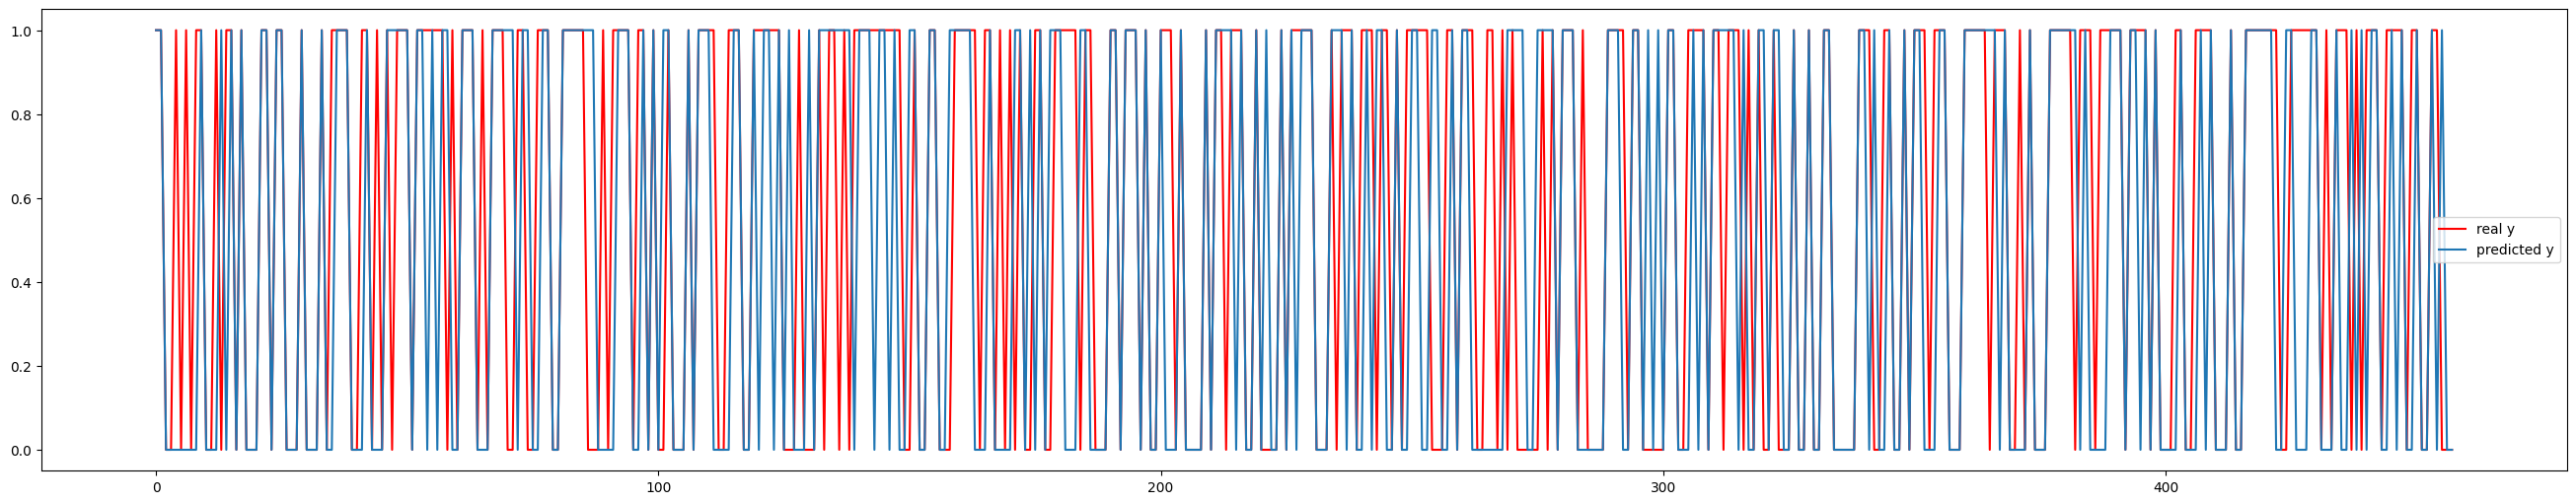

In [83]:
figure, axes = plt.subplots(ncols = 1, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes.plot(y_train1, label = 'real y', color = 'r')
axes.plot(yh, label = 'predicted y')
plt.legend()
plt.show()

Use weights for predicting testset:

In [84]:
A1 = x_test1
A1 = np.delete(A1,-1,0)
B = np.delete(A1,-1,0)

m,n = A1.shape
A1 = np.append(np.zeros([1,n]), A1, axis = 0)

m,n = B.shape
B = np.append(np.zeros([1,n]), B, axis = 0)
B = np.append(np.zeros([1,n]), B, axis = 0)

A1 = np.concatenate((x_test1, A1, B), axis = 1)

#Add bias to testset
N = A1.shape[0]
A1 = np.column_stack([A1,np.ones(N)])

In [85]:
y = y_test1
y[y <= 0] = 0
y[y >  0] = 1

In [86]:
yh = np.dot(A1,x.value)

yh = yh.reshape(-1)
y = y.reshape(-1)

print("Cross Entropy error is:", CE(y,yh))

yh[yh > mean] = 1
yh[yh < mean] = 0

Cross Entropy error is: nan


<ipython-input-15-5ce4873608af>:2: RuntimeWarning: invalid value encountered in log1p
  m = np.mean(y*np.log1p(1/yh-1)+(1-y)*np.log1p(1/(1-yh)-1))


Calculate the accuracy:

In [87]:
print(accuracy(yh, y))
print("The norm of the residual is ", (cp.pnorm(yh - y, p=2).value)**2)

65.38461538461539
The norm of the residual is  27.0


Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

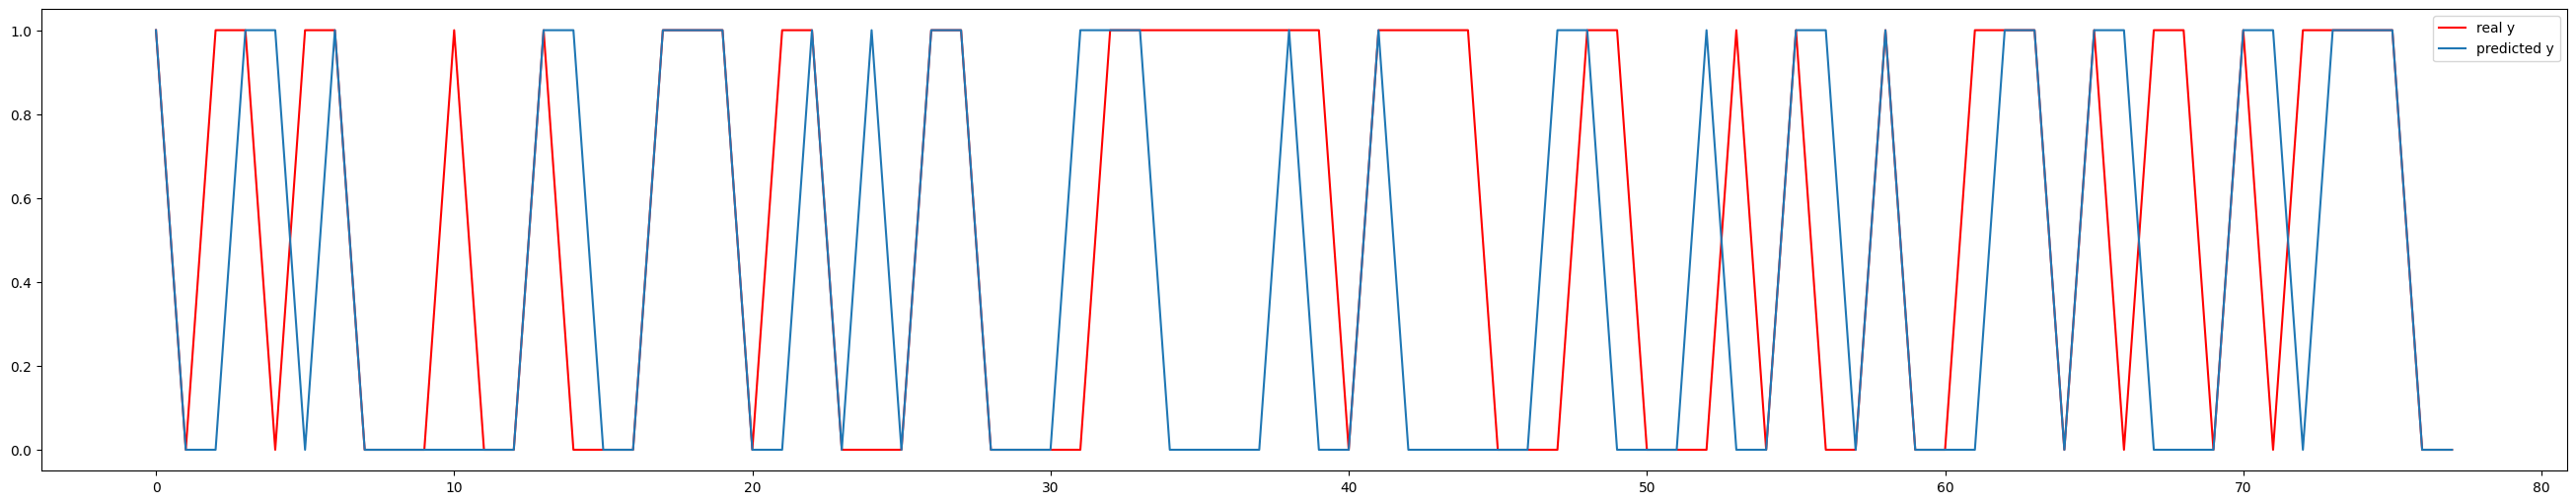

In [88]:
figure, axes = plt.subplots(ncols = 1, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes.plot(y_test1, label = 'real y', color = 'r')
axes.plot(yh, label = 'predicted y')
plt.legend()
plt.show()

The SVM method:

In [89]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [90]:
y = y_train1

y[y <= 0] = -1
y[y > 0] = 1

In [91]:
#Initializing values and computing H. Note the 1. to force to float type
C = 100
m,n = A.shape
X = A
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
#print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

     pcost       dcost       gap    pres   dres
 0: -1.4100e+04 -4.6650e+06  1e+07  1e+00  5e-12
 1: -1.1402e+04 -2.0142e+06  2e+06  8e-02  5e-12
 2: -1.4388e+04 -1.7642e+05  2e+05  4e-03  4e-12
 3: -1.6377e+04 -4.0950e+04  2e+04  5e-04  4e-12
 4: -2.0098e+04 -3.4260e+04  1e+04  3e-04  5e-12
 5: -2.2121e+04 -3.0637e+04  9e+03  1e-04  4e-12
 6: -2.3357e+04 -2.7999e+04  5e+03  5e-05  5e-12
 7: -2.4231e+04 -2.6392e+04  2e+03  2e-05  6e-12
 8: -2.4770e+04 -2.5533e+04  8e+02  6e-06  6e-12
 9: -2.4960e+04 -2.5235e+04  3e+02  2e-06  6e-12
10: -2.5026e+04 -2.5139e+04  1e+02  5e-07  6e-12
11: -2.5056e+04 -2.5096e+04  4e+01  1e-07  6e-12
12: -2.5067e+04 -2.5080e+04  1e+01  5e-13  7e-12
13: -2.5073e+04 -2.5074e+04  2e+00  6e-14  6e-12
14: -2.5073e+04 -2.5073e+04  1e-01  3e-13  7e-12
15: -2.5073e+04 -2.5073e+04  6e-03  3e-13  8e-12
Optimal solution found.
w =  [ 3.64637381e-01  1.50981439e-01  3.52535113e-01  9.51090961e-02
 -1.98280139e-01  5.52378910e-01  6.54727174e-01 -7.02063871e-02
 -5.25819

Predict the trainset to calculate the mean of the output:

In [92]:
A = X
yh = np.sign(np.dot(A,w.flatten().reshape((A.shape[1],y_train.shape[1]))) + b[0])
accuracy(yh, y)

73.7991266375546

Predict the testset:

In [93]:
y = y_test1

y[y <= 0] = -1
y[y > 0] = 1

In [94]:
yh = np.sign(np.dot(A1,w.flatten().reshape(((A1.shape[1],y_test.shape[1]))) + b[0]))
y = y.reshape(-1)
yh = yh.reshape(-1)

print(yh.shape)
print(y.shape)

(78,)
(78,)


Calculate Accuracy:

In [95]:
print(accuracy(yh, y))
print("The norm of the residual is ", (cp.pnorm(yh - y, p=2).value)**2)

70.51282051282051
The norm of the residual is  91.99999999999999


Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

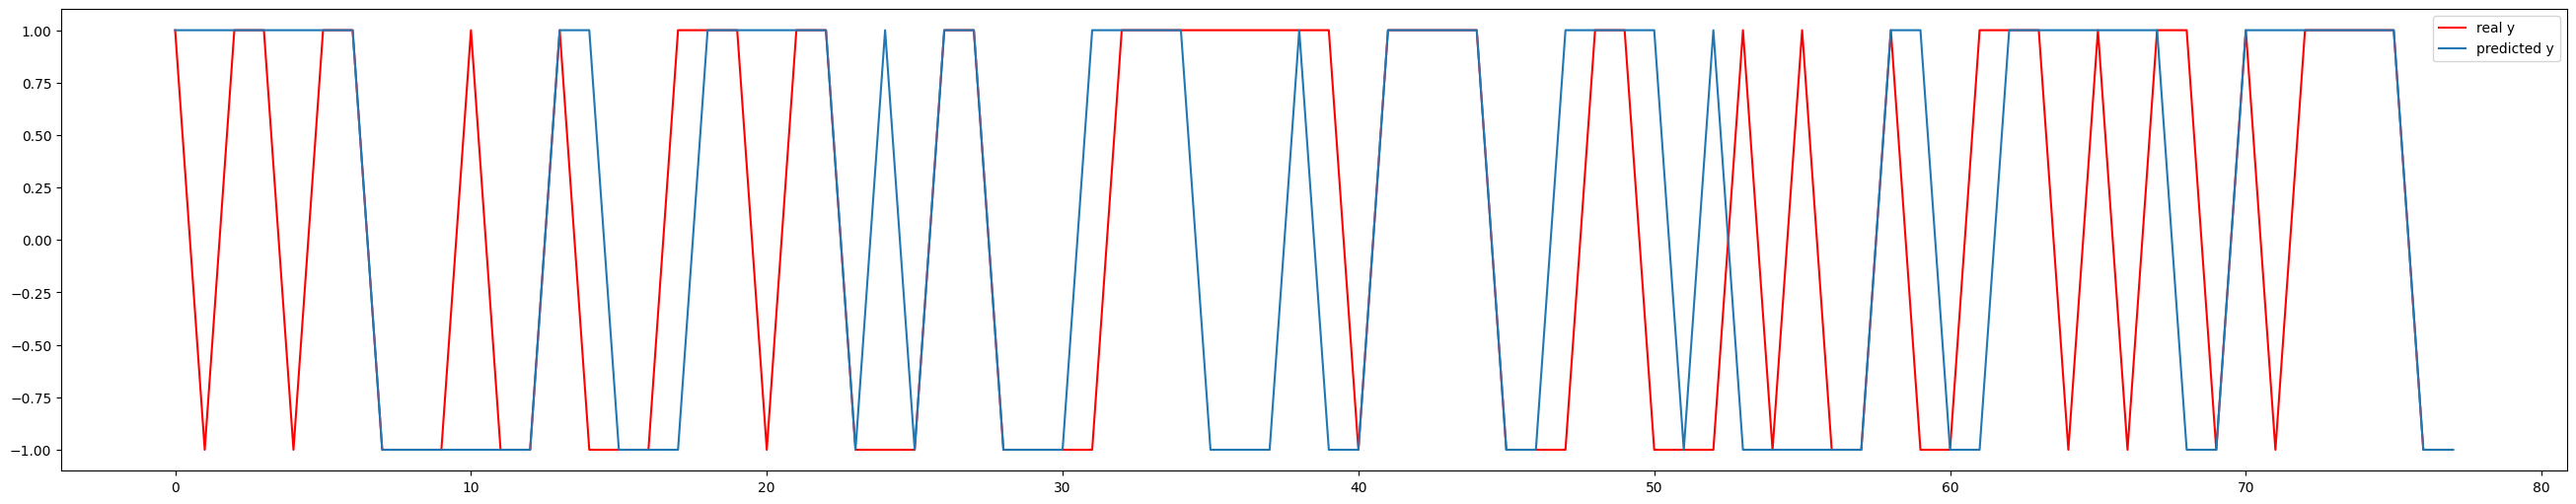

In [96]:
figure, axes = plt.subplots(ncols = 1, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes.plot(y_test1, label = 'real y', color = 'r')
axes.plot(yh, label = 'predicted y')
plt.legend()
plt.show()

##Use previous data to predict todays Total return index:

(only data of three days before)

The LS model:

In [97]:
A = x_train1
A = np.delete(A,-1,0)
B = np.delete(A,-1,0)
C = np.delete(B,-1,0)

m,n = A.shape
A = np.append(np.zeros([1,n]), A, axis = 0)

m,n = B.shape
B = np.append(np.zeros([1,n]), B, axis = 0)
B = np.append(np.zeros([1,n]), B, axis = 0)

m,n = C.shape
C = np.append(np.zeros([1,n]), C, axis = 0)
C = np.append(np.zeros([1,n]), C, axis = 0)
C = np.append(np.zeros([1,n]), C, axis = 0)

A = np.concatenate((x_train1, A, B, C), axis = 1)

#add bias
N = A.shape[0]
A = np.column_stack([A,np.ones(N)])

print(A.shape)

b = y_train1
print(b.shape)
A

(458, 29)
(458, 1)


array([[-0.34746882,  0.10313673,  0.26025641, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.48561117,  0.51033164,  0.94119895, ...,  0.        ,
         0.        ,  1.        ],
       [-2.07094796, -1.19912816, -2.21637621, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.10856148,  0.28816854,  0.10466773, ...,  0.28903795,
        -0.06090406,  1.        ],
       [-0.03363278, -0.28884847, -0.62749901, ...,  0.59105473,
         0.35168033,  1.        ],
       [-0.21480484, -0.49136888, -0.85499238, ..., -0.21583225,
        -0.09297796,  1.        ]])

In [98]:
# Define and solve the CVXPY problem.
x = cp.Variable([A.shape[1],b.shape[1]])
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", (cp.pnorm(A @ x - b, p=2).value)**2)


The optimal value is 296.6950583043487
The optimal x is
[[ 0.10661109]
 [-0.07839335]
 [ 0.11991856]
 [ 0.01956684]
 [-0.11245253]
 [ 0.29762114]
 [ 0.22646965]
 [ 0.04512285]
 [-0.15661688]
 [-0.22331496]
 [ 0.08799242]
 [ 0.09692438]
 [ 0.22600324]
 [-0.04359324]
 [-0.03351439]
 [-0.03075436]
 [-0.08990493]
 [ 0.09356637]
 [ 0.01259703]
 [ 0.00691268]
 [ 0.02061537]
 [-0.10662681]
 [ 0.01981027]
 [ 0.10932598]
 [ 0.12619722]
 [-0.03798299]
 [-0.04587482]
 [-0.16050583]
 [ 0.15323289]]
The norm of the residual is  296.6950583043488


Use weights for predicting trainset:

In [99]:
A = x_train1
A = np.delete(A,-1,0)
B = np.delete(A,-1,0)
C = np.delete(B,-1,0)

m,n = A.shape
A = np.append(np.zeros([1,n]), A, axis = 0)

m,n = B.shape
B = np.append(np.zeros([1,n]), B, axis = 0)
B = np.append(np.zeros([1,n]), B, axis = 0)

m,n = C.shape
C = np.append(np.zeros([1,n]), C, axis = 0)
C = np.append(np.zeros([1,n]), C, axis = 0)
C = np.append(np.zeros([1,n]), C, axis = 0)

A = np.concatenate((x_train1, A, B, C), axis = 1)

#Add bias to testset
N = A.shape[0]
A = np.column_stack([A,np.ones(N)])

In [100]:
yh = np.dot(A,x.value)
mean = np.mean(yh)
yh[yh > mean] = 1
yh[yh < mean] = 0

In [101]:
y = y_train1
y[y <= 0] = 0
y[y >  0] = 1

Calculate the train accuracy:

In [102]:
accuracy(yh, y)

75.764192139738

Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

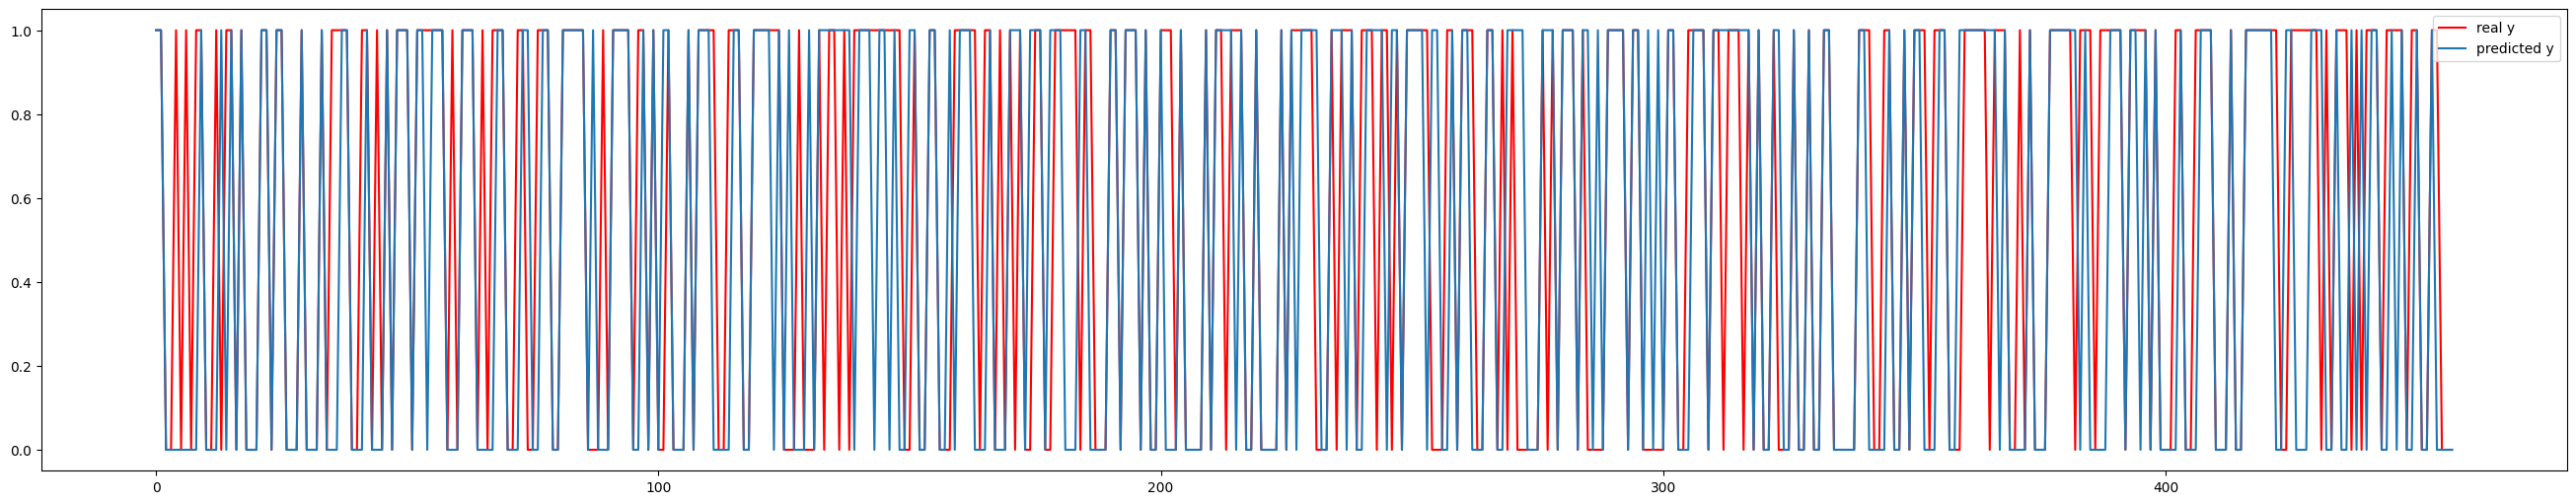

In [103]:
figure, axes = plt.subplots(ncols = 1, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes.plot(y_train1, label = 'real y', color = 'r')
axes.plot(yh, label = 'predicted y')
plt.legend()
plt.show()

Use weights for predicting testset:

In [104]:
A1 = x_test1
A1 = np.delete(A1,-1,0)
B = np.delete(A1,-1,0)
C = np.delete(B,-1,0)

m,n = A1.shape
A1 = np.append(np.zeros([1,n]), A1, axis = 0)

m,n = B.shape
B = np.append(np.zeros([1,n]), B, axis = 0)
B = np.append(np.zeros([1,n]), B, axis = 0)

m,n = C.shape
C = np.append(np.zeros([1,n]), C, axis = 0)
C = np.append(np.zeros([1,n]), C, axis = 0)
C = np.append(np.zeros([1,n]), C, axis = 0)

A1 = np.concatenate((x_test1, A1, B, C), axis = 1)

#Add bias to testset
N = A1.shape[0]
A1 = np.column_stack([A1,np.ones(N)])

In [105]:
yh = np.dot(A1,x.value)
yh[yh > mean] = 1
yh[yh < mean] = 0

In [106]:
y = y_test1
y[y >  0] = 1
y[y <= 0] = 0

Calculate the accuracy:

In [107]:
print(accuracy(yh, y))
print("The norm of the residual is ", (cp.pnorm(y - yh, p=2).value)**2)

64.1025641025641
The norm of the residual is  28.000000000000004


Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

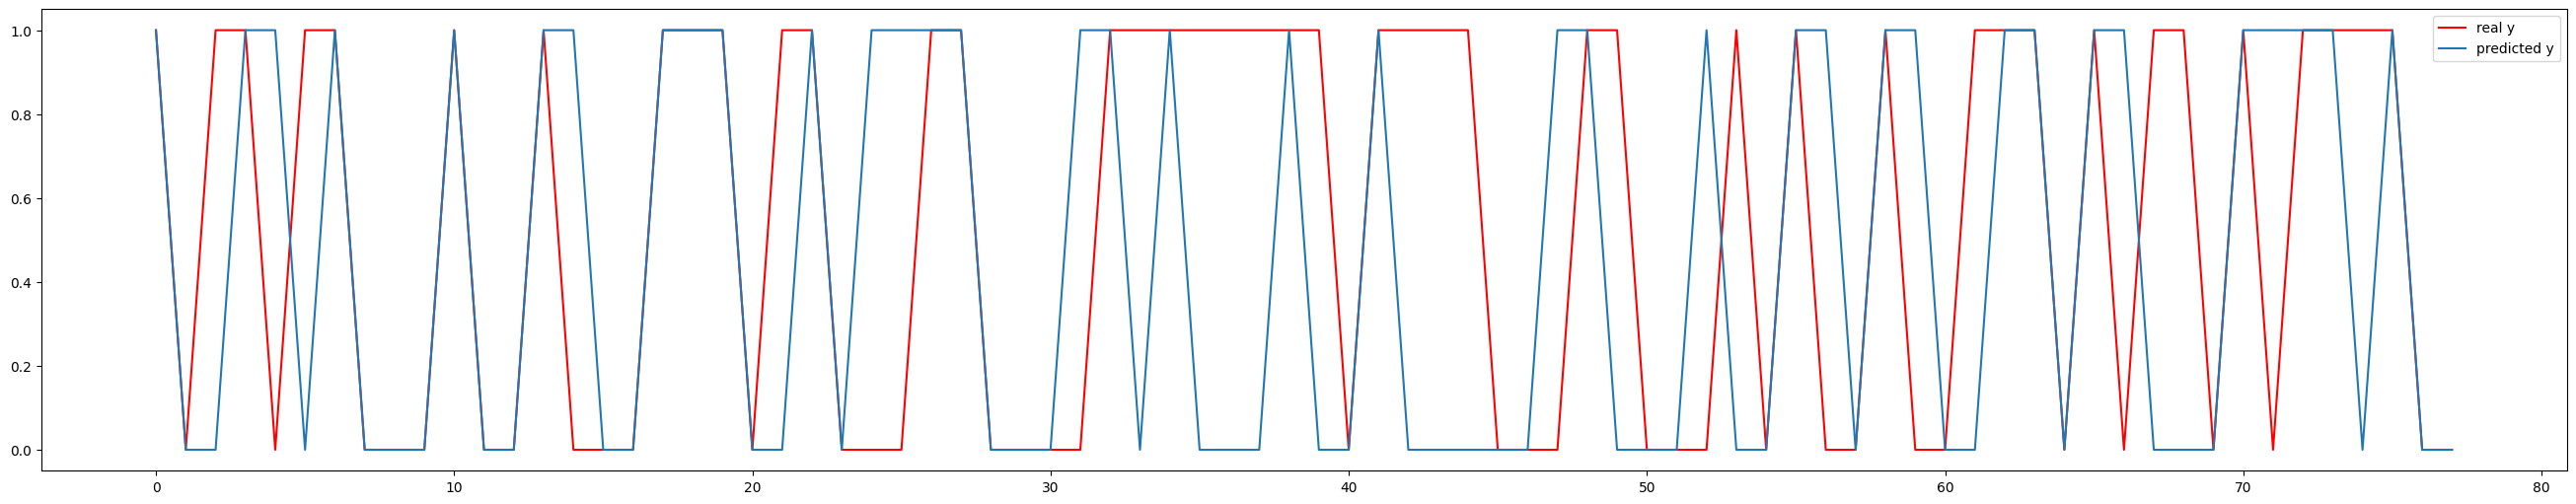

In [108]:
figure, axes = plt.subplots(ncols = 1, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes.plot(y_test1, label = 'real y', color = 'r')
axes.plot(yh, label = 'predicted y')
plt.legend()
plt.show()

The SVM method:

In [109]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [110]:
y = y_train1

y[y <= 0] = -1
y[y > 0] = 1

In [111]:
#Initializing values and computing H. Note the 1. to force to float type
C = 100
m,n = A.shape
X = A
y = y.reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format - as previously
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

#==================Computing and printing parameters===============================#
w = ((y * alphas).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = y[S] - np.dot(X[S], w)

#Display results
#print('Alphas = ',alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

     pcost       dcost       gap    pres   dres
 0: -1.3171e+04 -5.4017e+06  2e+07  1e+00  6e-12
 1: -8.5868e+03 -2.7424e+06  4e+06  1e-01  6e-12
 2: -1.2149e+04 -3.5155e+05  4e+05  9e-03  5e-12
 3: -1.4335e+04 -4.6668e+04  3e+04  8e-04  5e-12
 4: -1.7807e+04 -3.5278e+04  2e+04  4e-04  5e-12
 5: -1.9522e+04 -3.0575e+04  1e+04  2e-04  5e-12
 6: -2.1005e+04 -2.7254e+04  6e+03  9e-05  6e-12
 7: -2.1862e+04 -2.5356e+04  3e+03  4e-05  6e-12
 8: -2.2346e+04 -2.4350e+04  2e+03  2e-05  6e-12
 9: -2.2717e+04 -2.3630e+04  9e+02  7e-06  7e-12
10: -2.2943e+04 -2.3235e+04  3e+02  1e-06  8e-12
11: -2.3031e+04 -2.3107e+04  8e+01  2e-07  7e-12
12: -2.3048e+04 -2.3081e+04  3e+01  5e-08  8e-12
13: -2.3058e+04 -2.3068e+04  9e+00  1e-08  7e-12
14: -2.3062e+04 -2.3064e+04  2e+00  1e-09  8e-12
15: -2.3063e+04 -2.3063e+04  2e-01  1e-10  8e-12
16: -2.3063e+04 -2.3063e+04  6e-03  3e-12  8e-12
Optimal solution found.
w =  [ 2.77644529e-01 -2.97575787e-01  3.94118085e-01  2.31341487e-01
 -2.75241408e-01  1.14616

Predict the trainset to calculate the mean of the output:

In [112]:
A = X
yh = np.sign(np.dot(A,w.flatten().reshape((A.shape[1],y_train.shape[1]))) + b[0])
print(accuracy(yh, y))
print("The norm of the residual is ", (cp.pnorm(y - yh, p=2).value)**2)

64.8471615720524
The norm of the residual is  644.0


Predict the testset:

In [113]:
y = y_test1

y[y <= 0] = -1
y[y > 0] = 1

In [114]:
yh = np.sign(np.dot(A1,w.flatten().reshape(((A1.shape[1],y_test.shape[1]))) + b[0]))

y = y.reshape(-1)
yh = yh.reshape(-1)

print(yh.shape)
print(y.shape)

(78,)
(78,)


Calculate Accuracy:

In [115]:
print(accuracy(yh, y))
print("The norm of the residual is ", (cp.pnorm(y - yh, p=2).value)**2)

61.53846153846154
The norm of the residual is  120.0


Show Predicted ($\hat{Y}_2$) and real value ($Y_2$):

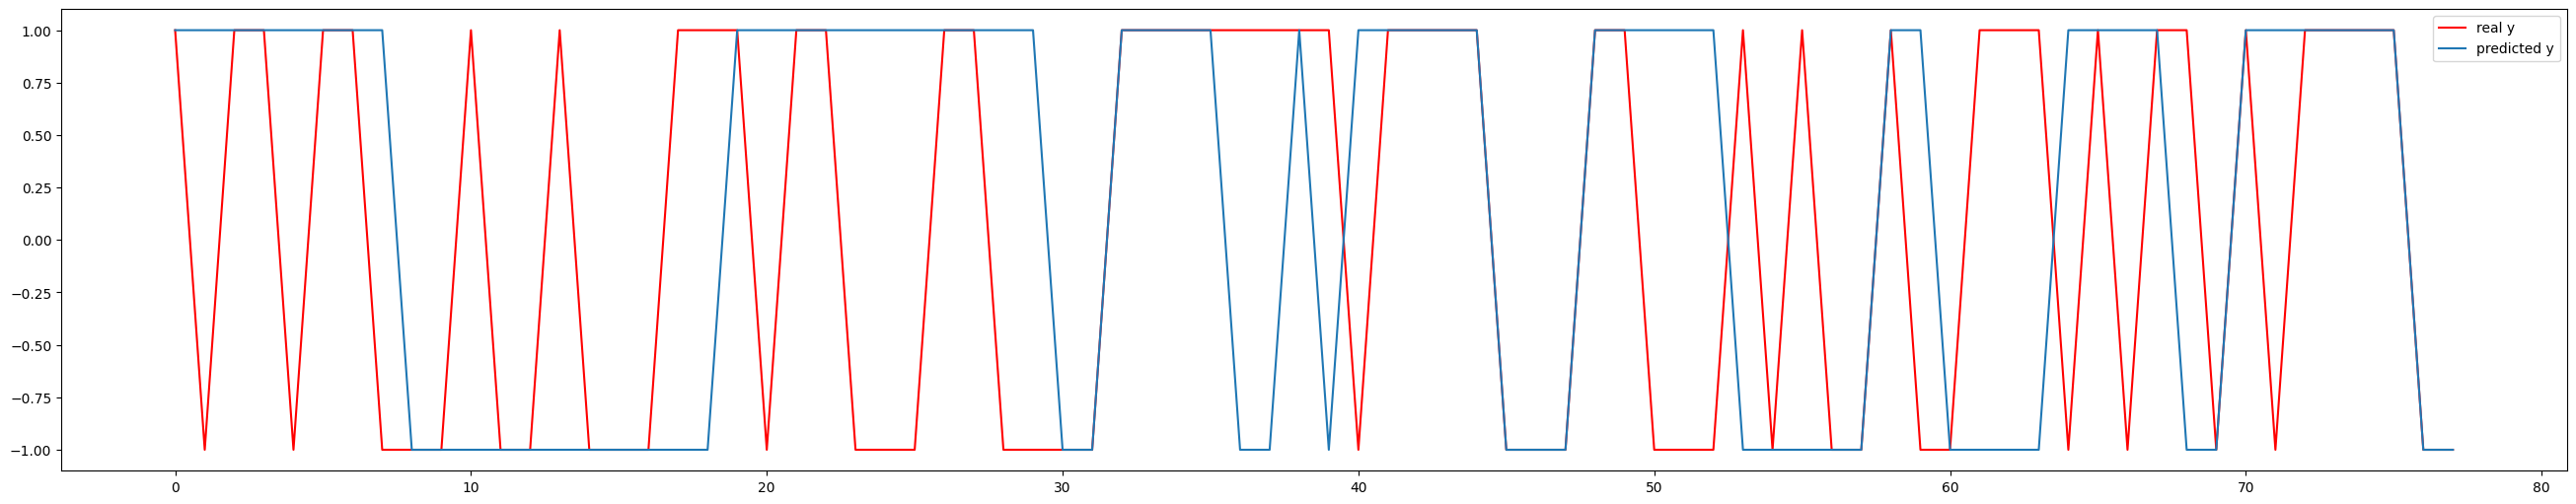

In [116]:
figure, axes = plt.subplots(ncols = 1, nrows = 1, constrained_layout=True, figsize=(26, 5))
axes.plot(y_test1, label = 'real y', color = 'r')
axes.plot(yh, label = 'predicted y')
plt.legend()
plt.show()